## Onion monthly wholesale prices
### I am newbie to ML. Playing with fuzzy logic, trying to make good predictions for small datasets. 
### Here is a part of my understandings.

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pyFTS.models import hofts, pwfts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures
from itertools import product
from pyFTS.common import Util

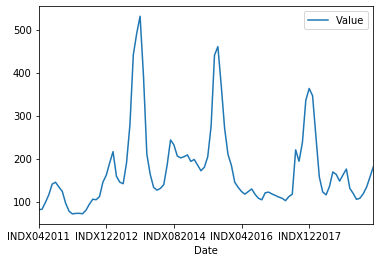

In [14]:
series=pd.read_csv('onionwpi.csv', header=0, index_col=0)
sr=series[:100]
sr.plot()
plt.show()

In [15]:
series.count()

Value    104
dtype: int64

In [16]:
train = series['Value'].values[:75]
test = series['Value'].values[75:]

In [17]:
levels = ['VL','L','NL', 'NH', 'H', 'VH']
sublevels = [str(k) for k in np.arange(0,2)]
names = []
for combination in product(*[levels, sublevels]):
  names.append(combination[0]+combination[1])  
print(names)

['VL0', 'VL1', 'L0', 'L1', 'NL0', 'NL1', 'NH0', 'NH1', 'H0', 'H1', 'VH0', 'VH1']


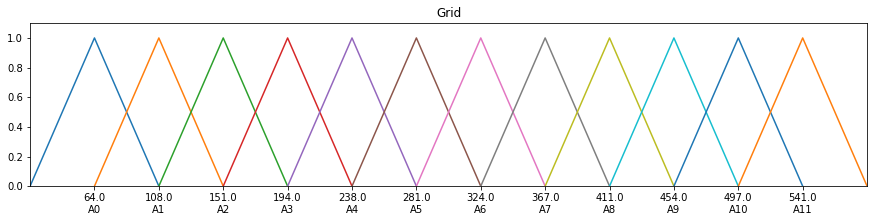

In [18]:
part = Grid.GridPartitioner(data=train,npart=12)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,3])
part.plot(ax)

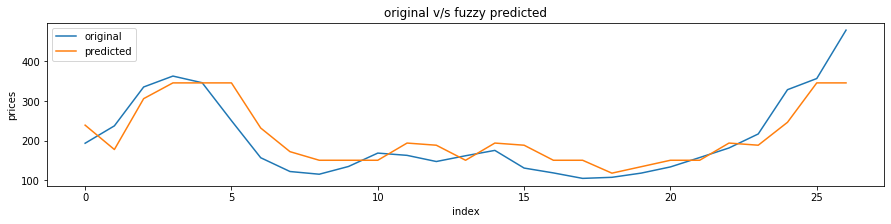

,RMSE,MAPE,U
0,47.7,19.82,0.81


In [19]:
# hofts
mesr = []
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,3])
ax.plot(test[2:],label='original')
model = hofts.HighOrderFTS(order=2, partitioner=part)
model.fit(train)
forecasts = model.predict(test)
ax.plot(forecasts,label='predicted')
plt.xlabel('index')
plt.ylabel('prices')
plt.title('original v/s fuzzy predicted')
plt.legend()
plt.show()
rmse, mape, u = Measures.get_point_statistics(test, model)
mesr.append([rmse, mape, u])
pd.DataFrame(mesr, columns=['RMSE','MAPE','U'])

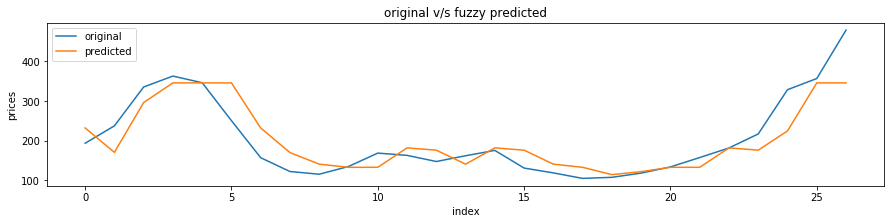

,RMSE,MAPE,U
0,48.1,17.31,0.82


In [20]:
# weighted-hofts
mesr = []
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,3])
ax.plot(test[2:],label='original')
model = hofts.WeightedHighOrderFTS(order=2, partitioner=part)
model.fit(train)
forecasts = model.predict(test)
ax.plot(forecasts,label='predicted')
plt.xlabel('index')
plt.ylabel('prices')
plt.title('original v/s fuzzy predicted')
plt.legend()
plt.show()
rmse, mape, u = Measures.get_point_statistics(test, model)
mesr.append([rmse, mape, u])
pd.DataFrame(mesr, columns=['RMSE','MAPE','U'])

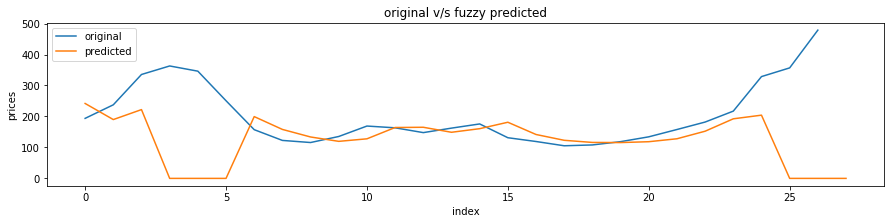

,RMSE,MAPE,U
0,162.84,33.16,2.7


In [21]:
# pwfts
mesr = []
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,3])
ax.plot(test[2:],label='original')
model = pwfts.ProbabilisticWeightedFTS(order=2, partitioner=part)
model.fit(train)
forecasts = model.predict(test)
ax.plot(forecasts,label='predicted')
plt.xlabel('index')
plt.ylabel('prices')
plt.title('original v/s fuzzy predicted')
plt.legend()
plt.show()
rmse, mape, u = Measures.get_point_statistics(test, model)
mesr.append([rmse, mape, u])
pd.DataFrame(mesr, columns=['RMSE','MAPE','U'])